Brandon Connors  
11/11/23  
Machine Learning Midterm

### Introduction

### Importing the Connection String

In [2]:
import json

# Loading the json file that contains the connection string
with open('D:\\School\\Fall 2023\\secrets.json') as d:
    data = json.load(d)

    # Extracting the connection string from the file
    connectionString = data['mongodbRead']

# Sanity check to make sure that I've pulled the right data
print(f"My connection string is {len(connectionString)} characters in length.")

My connection string is 73 characters in length.


### Connecting to the Database and Verifying the Connection

In [3]:
# I copied this section of code from the professor's sample code labeled "Basics of Loading Data" and then modified it to work with my connection string above

import pandas as pd
import re
import pymongo
import certifi

# Connects to the database called DA320 using known good certificates, accesses the list of collection names, and prints them out with the version of MongoDB.
client = pymongo.MongoClient(connectionString, tlsCAFile=certifi.where())
db = client.DA320
allCollections = db.list_collection_names()
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")


Using MongoDB version 6.0.11.
This database has the collections ['MetacriticMovies', 'IMDB_Superhero_2', 'IMDB_Pipeline_View']


### Accessing the Data in the Database Collections

In [4]:
# Accessing the data from the transformed IMDb pipeline view for a specific year
imdbDataFrame = pd.DataFrame(db.IMDB_Pipeline_View.find({"release_year": { "$gt": 1999}}))
# Checking the number of results
print(f"My resulting table has {len(imdbDataFrame.id)} rows and {len(imdbDataFrame.columns)} columns")
imdbDataFrame.head()

My resulting table has 22146 rows and 19 columns


,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company,slimmed_rating,release_year,release_month
0,652cd352f089e541968c809c,11354364,Reveal,130.0,4.6,1508,None,2019-11-29,NaN,NaN,NaN,"[Mystery, Thriller]","[Aadhya Aaradhana, Advith Narayanankutty, Sudh...",[Murali .S.V.],[Jayasudha K.],[Sri Manjunatha Cine Combines],None,2019,11
1,652cd355f089e541968c9756,116138,Drawing Flies,76.0,5.2,1425,None,2002-02-26,NaN,NaN,NaN,[Comedy],"[Jason Lee, Renée Humphrey, Jason Mewes, Carme...","[Matthew Gissing, Malcolm Ingram]","[Lisa N. Cohen, Mark Cohen, Matthew Gissing, M...","[Aaron Gustafson, IndieDVD, Kelly McCarthy, Vi...",None,2002,2
2,652cd356f089e541968c99bd,127759,L.E.T.H.A.L. Ladies: Return to Savage Beach,98.0,3.7,1351,[R],2006-02-14,NaN,NaN,NaN,"[Action, Adventure]","[Julie Strain, Rodrigo Obregón, Julie K. Smith...",[Andy Sidaris],"[Arlene Sidaris, Christian Drew Sidaris]","[Malibu Bay Films, Skyhawks Films]",R,2006,2
3,652cd356f089e541968c9d14,172495,Gladiator,155.0,8.5,1461000,[TV-14],2000-05-01,103000000.0,34819017.0,457640427.0,"[Action, Adventure, Drama]","[Russell Crowe, Joaquin Phoenix, Connie Nielse...",[Ridley Scott],"[David Franzoni, Branko Lustig, Laurie MacDona...","[Dreamworks Pictures, Universal Pictures, Scot...",TV-14,2000,5
4,652cd356f089e541968c9d16,209144,Memento,113.0,8.4,1211679,[R],2000-09-05,9000000.0,235488.0,39723096.0,"[Mystery, Thriller]","[Guy Pearce, Carrie-Anne Moss, Joe Pantoliano,...",[Christopher Nolan],"[Christopher Ball, Elaine Dysinger, Aaron Ryde...","[Newmarket Capital Group, Team Todd, I Remembe...",R,2000,9


In [5]:

# Accessing the data from the Metacritic collection and then transforming scores and release date to the appropriate data type
metacriticDataFrame = pd.DataFrame(db.MetacriticMovies.find())
metacriticDataFrame.score = pd.to_numeric(metacriticDataFrame.score, errors="coerce")
metacriticDataFrame.release_date = pd.to_datetime(metacriticDataFrame.release_date, errors="coerce")

# Checking the number of results
print(f"My resulting table has {len(metacriticDataFrame.title)} rows and {len(metacriticDataFrame.columns)} columns")
metacriticDataFrame.head()

My resulting table has 10828 rows and 7 columns


,_id,movie_id,title,release_date,description,score,thumbnail
0,652cd312f089e541968c5648,11237,Almost Famous,2000-09-13,"In the 1970's, a high school boy (Fugit) is gi...",90,https://static.metacritic.com/images/products/...
1,652cd312f089e541968c564a,11239,The Wind Will Carry Us,2000-07-28,"With a strange mission, a group of people from...",86,https://static.metacritic.com/images/products/...
2,652cd312f089e541968c5652,11247,One Day in September,2000-11-17,This documentary examines the events surroundi...,82,https://static.metacritic.com/images/products/...
3,652cd312f089e541968c5661,11262,Thirteen,2000-06-02,The quasi-documentary story of a year in the l...,78,https://static.metacritic.com/images/products/...
4,652cd312f089e541968c5666,11267,Pollock,2000-12-15,A look back into the life of an extraordinary ...,77,https://static.metacritic.com/images/products/...


### Combining the Two Data Frames into a Single Data Frame

In [6]:
# Merging the two dataframes using an inner join
unifiedDataFrame = pd.merge(imdbDataFrame, metacriticDataFrame, how="inner", on="title")
# Checking the number of results
print(f"My resulting table has {len(unifiedDataFrame.title)} rows and {len(unifiedDataFrame.columns)} columns")
unifiedDataFrame.head()

My resulting table has 9148 rows and 25 columns


,_id_x,id,title,runtime,user_rating,votes,mpaa_rating,release_date_x,budget,opening_weekend,...,company,slimmed_rating,release_year,release_month,_id_y,movie_id,release_date_y,description,score,thumbnail
0,652cd356f089e541968c9d14,172495,Gladiator,155.0,8.5,1461000,[TV-14],2000-05-01,103000000.0,34819017.0,...,"[Dreamworks Pictures, Universal Pictures, Scot...",TV-14,2000,5,652cd312f089e541968c56b1,11342,2000-05-05,"Before Maximus (Crowe), the heroic Roman Gener...",67,https://static.metacritic.com/images/products/...
1,652cd356f089e541968c9d16,209144,Memento,113.0,8.4,1211679,[R],2000-09-05,9000000.0,235488.0,...,"[Newmarket Capital Group, Team Todd, I Remembe...",R,2000,9,652cd312f089e541968c57cd,11626,2001-03-16,"Dismissed by the police, Leonard Shelby (Pearc...",80,https://static.metacritic.com/images/products/...
2,652cd356f089e541968c9d18,175142,Scary Movie,88.0,6.2,256114,[TV-MA],2000-07-07,19000000.0,42346669.0,...,"[Dimension Films, Wayans Bros. Entertainment, ...",TV-MA,2000,7,652cd312f089e541968c571e,11451,2000-07-07,"A comic spoof in the tradition of ""Airplane,"" ...",48,https://static.metacritic.com/images/products/...
3,652cd356f089e541968c9d29,191397,The Replacements,118.0,6.6,64599,[PG-13],2000-08-07,50000000.0,11039214.0,...,"[Bel Air Entertainment, Dylan Sellers Producti...",PG-13,2000,8,652cd312f089e541968c5780,11549,2000-08-11,It's late in the season; the playoffs are fast...,30,https://static.metacritic.com/images/products/...
4,652cd356f089e541968c9d2f,204946,Bring It On,98.0,6.1,95631,"[TV-PG, (DL, TV Rating.)]",2000-08-22,11000000.0,17362105.0,...,"[Beacon Communications, Beacon Pictures, Wonde...",TV-PG,2000,8,652cd312f089e541968c570b,11432,2000-08-25,The story of what a student goes through to ma...,52,https://static.metacritic.com/images/products/...


### Doing a Basic Regression Model

In [7]:
import statsmodels.formula.api

# Performing regression analysis on several numeric fields to identify which fields are more likely to contribute to a movie's sales
olsModel = statsmodels.formula.api.ols(
    formula="gross_sales ~ user_rating + budget + opening_weekend + votes + runtime + score",
    data=unifiedDataFrame).fit()
print(olsModel.summary())

                            OLS Regression Results                            
Dep. Variable:            gross_sales   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1409.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:05:35   Log-Likelihood:                -35353.
No. Observations:                1777   AIC:                         7.072e+04
Df Residuals:                    1770   BIC:                         7.076e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7.831e+07   2.34e+07     

### Importing and Testing AI Sentiment Analysis

In [8]:
import transformers

# Preparing the pipeline for the sentiment analysis on the descriptions
MODEL = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentimentTask = transformers.pipeline("sentiment-analysis", model=MODEL,
    tokenizer=transformers.AutoTokenizer.from_pretrained(MODEL))

# Testing a negative statement, it gave me a "negative" response with a score of ~0.61 when I first ran it
print(sentimentTask("I really wish it wasn't Monday!"))
# Testing a positive statement, it gave me a "positive" response with a score of ~0.82 when I first ran it
print(sentimentTask("I love to cuddle up with a good book by the fire!"))
# Testing a neutral statement, it gave me a "neutral" response with a score of ~0.77 when I first ran it
print(sentimentTask("The book Moby Dick was written by Herman Melville."))

All model checkpoint layers were used when initializing TFXLMRobertaForSequenceClassification.

All the layers of TFXLMRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-xlm-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaForSequenceClassification for predictions without further training.


[{'label': 'negative', 'score': 0.6078625321388245}]
[{'label': 'positive', 'score': 0.8234876990318298}]
[{'label': 'neutral', 'score': 0.7737166881561279}]


### Creating a Function to Convert Sentiment Analysis Results into a Single Scale

In [9]:
# This function converts the results from the sentiment analysis into a number on a single scale, this code copied from the professor's powerpoint presentation
def calculateSentiment(text):
    if text is None:
        return 0
    sentiment = sentimentTask(text)
    if sentiment[0]['label'] == 'negative':
        return 0 - sentiment[0]['score'] - 0.5
    elif sentiment[0]['label'] == 'neutral':
        return sentiment[0]['score'] - 0.5
    if sentiment[0]['label'] == 'positive':
        return 1 + sentiment[0]['score'] - 0.5

# Testing the function on the same text samples I used above:
print(calculateSentiment("I really wish it wasn't Monday!"))
print(calculateSentiment("I love to cuddle up with a good book by the fire!"))
print(calculateSentiment("The book Moby Dick was written by Herman Melville."))
print(calculateSentiment(None))

-1.1078625321388245
1.3234876990318298
0.27371668815612793
0


### Creating New Column in Data Frame with Results of Sentiment Analysis of Description

In [10]:
# Performing sentiment analysis on the descriptions, using "row.get('description')" will return None if there is no description.
sentimentColumn = unifiedDataFrame.apply(lambda row : calculateSentiment(row.get('description')), axis = 1)

# Adds the results of the sentiment analysis to the data frame as a new column labeled "sentiment"
unifiedDataFrame["sentiment"] = sentimentColumn

unifiedDataFrame.head()

,_id_x,id,title,runtime,user_rating,votes,mpaa_rating,release_date_x,budget,opening_weekend,...,slimmed_rating,release_year,release_month,_id_y,movie_id,release_date_y,description,score,thumbnail,sentiment
0,652cd356f089e541968c9d14,172495,Gladiator,155.0,8.5,1461000,[TV-14],2000-05-01,103000000.0,34819017.0,...,TV-14,2000,5,652cd312f089e541968c56b1,11342,2000-05-05,"Before Maximus (Crowe), the heroic Roman Gener...",67,https://static.metacritic.com/images/products/...,-0.994339
1,652cd356f089e541968c9d16,209144,Memento,113.0,8.4,1211679,[R],2000-09-05,9000000.0,235488.0,...,R,2000,9,652cd312f089e541968c57cd,11626,2001-03-16,"Dismissed by the police, Leonard Shelby (Pearc...",80,https://static.metacritic.com/images/products/...,-1.416058
2,652cd356f089e541968c9d18,175142,Scary Movie,88.0,6.2,256114,[TV-MA],2000-07-07,19000000.0,42346669.0,...,TV-MA,2000,7,652cd312f089e541968c571e,11451,2000-07-07,"A comic spoof in the tradition of ""Airplane,"" ...",48,https://static.metacritic.com/images/products/...,-0.005205
3,652cd356f089e541968c9d29,191397,The Replacements,118.0,6.6,64599,[PG-13],2000-08-07,50000000.0,11039214.0,...,PG-13,2000,8,652cd312f089e541968c5780,11549,2000-08-11,It's late in the season; the playoffs are fast...,30,https://static.metacritic.com/images/products/...,0.058028
4,652cd356f089e541968c9d2f,204946,Bring It On,98.0,6.1,95631,"[TV-PG, (DL, TV Rating.)]",2000-08-22,11000000.0,17362105.0,...,TV-PG,2000,8,652cd312f089e541968c570b,11432,2000-08-25,The story of what a student goes through to ma...,52,https://static.metacritic.com/images/products/...,0.133131


### Comparing Sentiment Analysis vs. MPAA/TV Rating

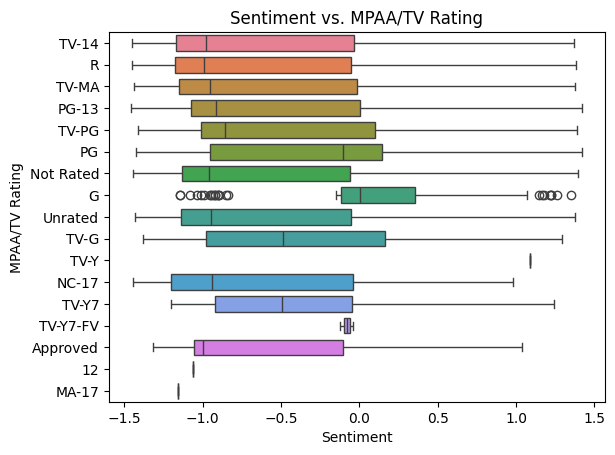

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt

# Plotting the data on a box plot to show the average ranges (and outliers) of the sentiment analysis when broken down by MPAA/TV Rating
ax = sns.boxplot(data=unifiedDataFrame, x="sentiment", y="slimmed_rating", gap=.1, hue="slimmed_rating", legend=False)
_ = ax.set(title="Sentiment vs. MPAA/TV Rating", xlabel="Sentiment", ylabel="MPAA/TV Rating")

### Comparing Sentiment to Release Month

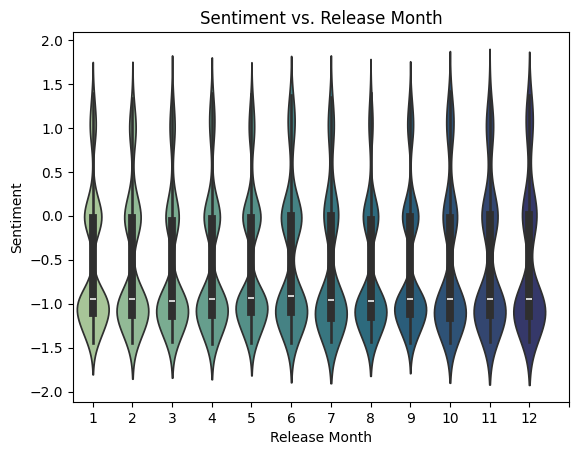

In [12]:
# Plotting the data on a box plot to show the average ranges of the sentiments of movies for each of the release months
ax = sns.violinplot(data=unifiedDataFrame, x="release_month", y="sentiment", legend=False, hue="release_month", palette="crest")
_ = ax.set(title="Sentiment vs. Release Month", xlabel="Release Month", ylabel="Sentiment", xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12])

### Conclusions